<a href="https://colab.research.google.com/github/simdfarook/pdf2word/blob/master/after_delete_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1095
1064
31
X_train.shape: (712, 9)
X_test.shape: (352, 9)
Y_train.shape: (712, 1)
Y_test.shape: (352, 1)
Y_predicted: [0 0 1 1 1 1 1 0 1 1]

this high_mumidity_label

accurancy check



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


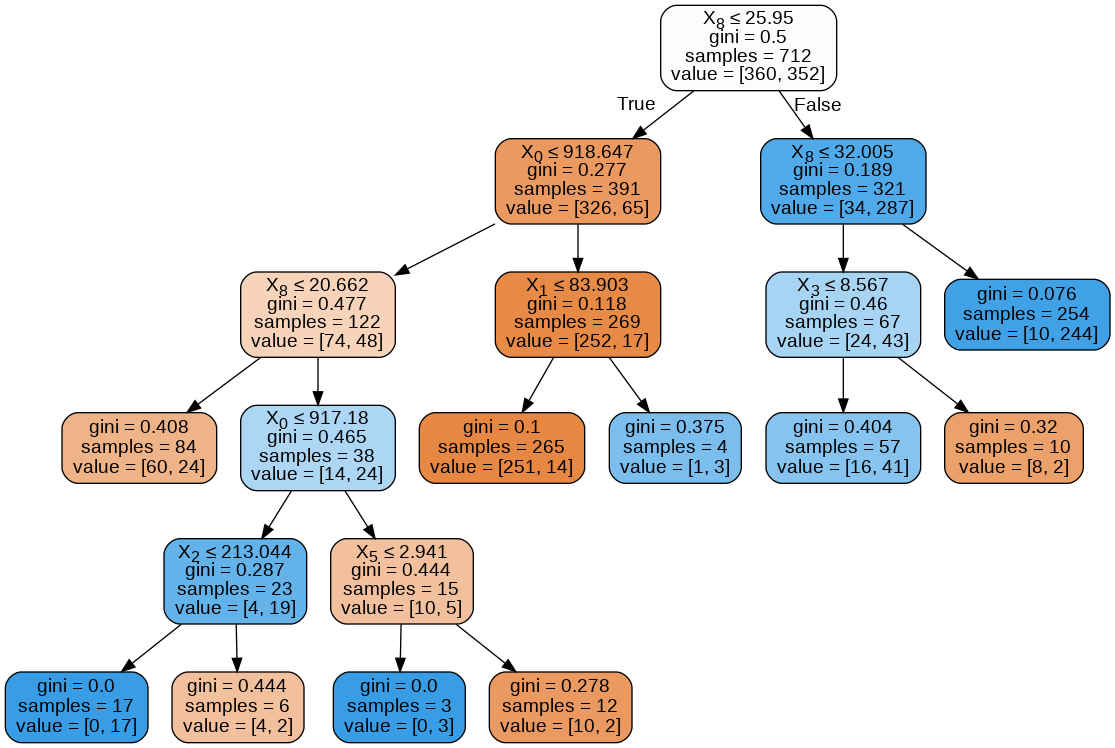

In [0]:





import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



df =  pd.read_csv('./daily_weather.csv')
df


df.columns
df.head(5)
df.tail()

df[df.isnull().any(axis=1)].head()

del df['number']
df
df.columns


before_rows = df.shape[0]
print(before_rows)


df = df.dropna()

after_rows = df.shape[0]
print(after_rows)

total_null_rows = before_rows - after_rows
print(total_null_rows)



clean_df= df.copy()

clean_df['high_humidity_label'] = (clean_df['relative_humidity_3pm'] >24.99) *1
clean_df['high_humidity_label'].head()

clean_df


Y = clean_df[['high_humidity_label']].copy()
Y.head()

df

df.columns

morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

morning_features

X = clean_df[morning_features].copy()
X.columns
Y.columns


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33, random_state=324)
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)

print('Y_train.shape:',Y_train.shape)
print('Y_test.shape:',Y_test.shape)



humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train,Y_train)


type(humidity_classifier)
#type(df)


Y_predicted = humidity_classifier.predict(X_test)
Y_predicted[:10]
print('Y_predicted:',Y_predicted[:10])

print()
print('this high_mumidity_label')
Y_test['high_humidity_label'][:10]

print()
print('accurancy check')
accuracy_score(Y_test,Y_predicted)*100


print()



from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())